# Step 1: Data Preprocessing

### Load Dataset & Initial EDA

In [ ]:
# Install necessary libraries if not already installed
!pip install kagglehub pandas matplotlib seaborn scikit-learn

In [ ]:
# Import required libraries
import kagglehub
import pandas as pd
import os

# Download Titanic dataset from KaggleHub
path = kagglehub.dataset_download("vinicius150987/titanic3")

# List the files inside the downloaded dataset folder to check the exact file name
print("Files in dataset folder:", os.listdir(path))

# Assuming the dataset file is named "titanic3.xls", adjust filename if different
file_name = "titanic3.xls"  # Change if needed
file_path = os.path.join(path, file_name)

# Load the dataset into a Pandas DataFrame
# Use pd.read_excel instead of pd.read_csv for Excel files
df = pd.read_excel(file_path) # Changed to pd.read_excel to handle .xls files

# Display the first few rows
print("First 5 rows of the dataset:")
display(df.head())

# Check dataset information
print("\nDataset Info:")
df.info()

Files in dataset folder: ['titanic3.xls']
First 5 rows of the dataset:


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


# Step 2: Exploratory Data Analysis (EDA)

Missing Values:


,0
pclass,0
survived,0
name,0
sex,0
age,263
sibsp,0
parch,0
ticket,0
fare,1
cabin,1014


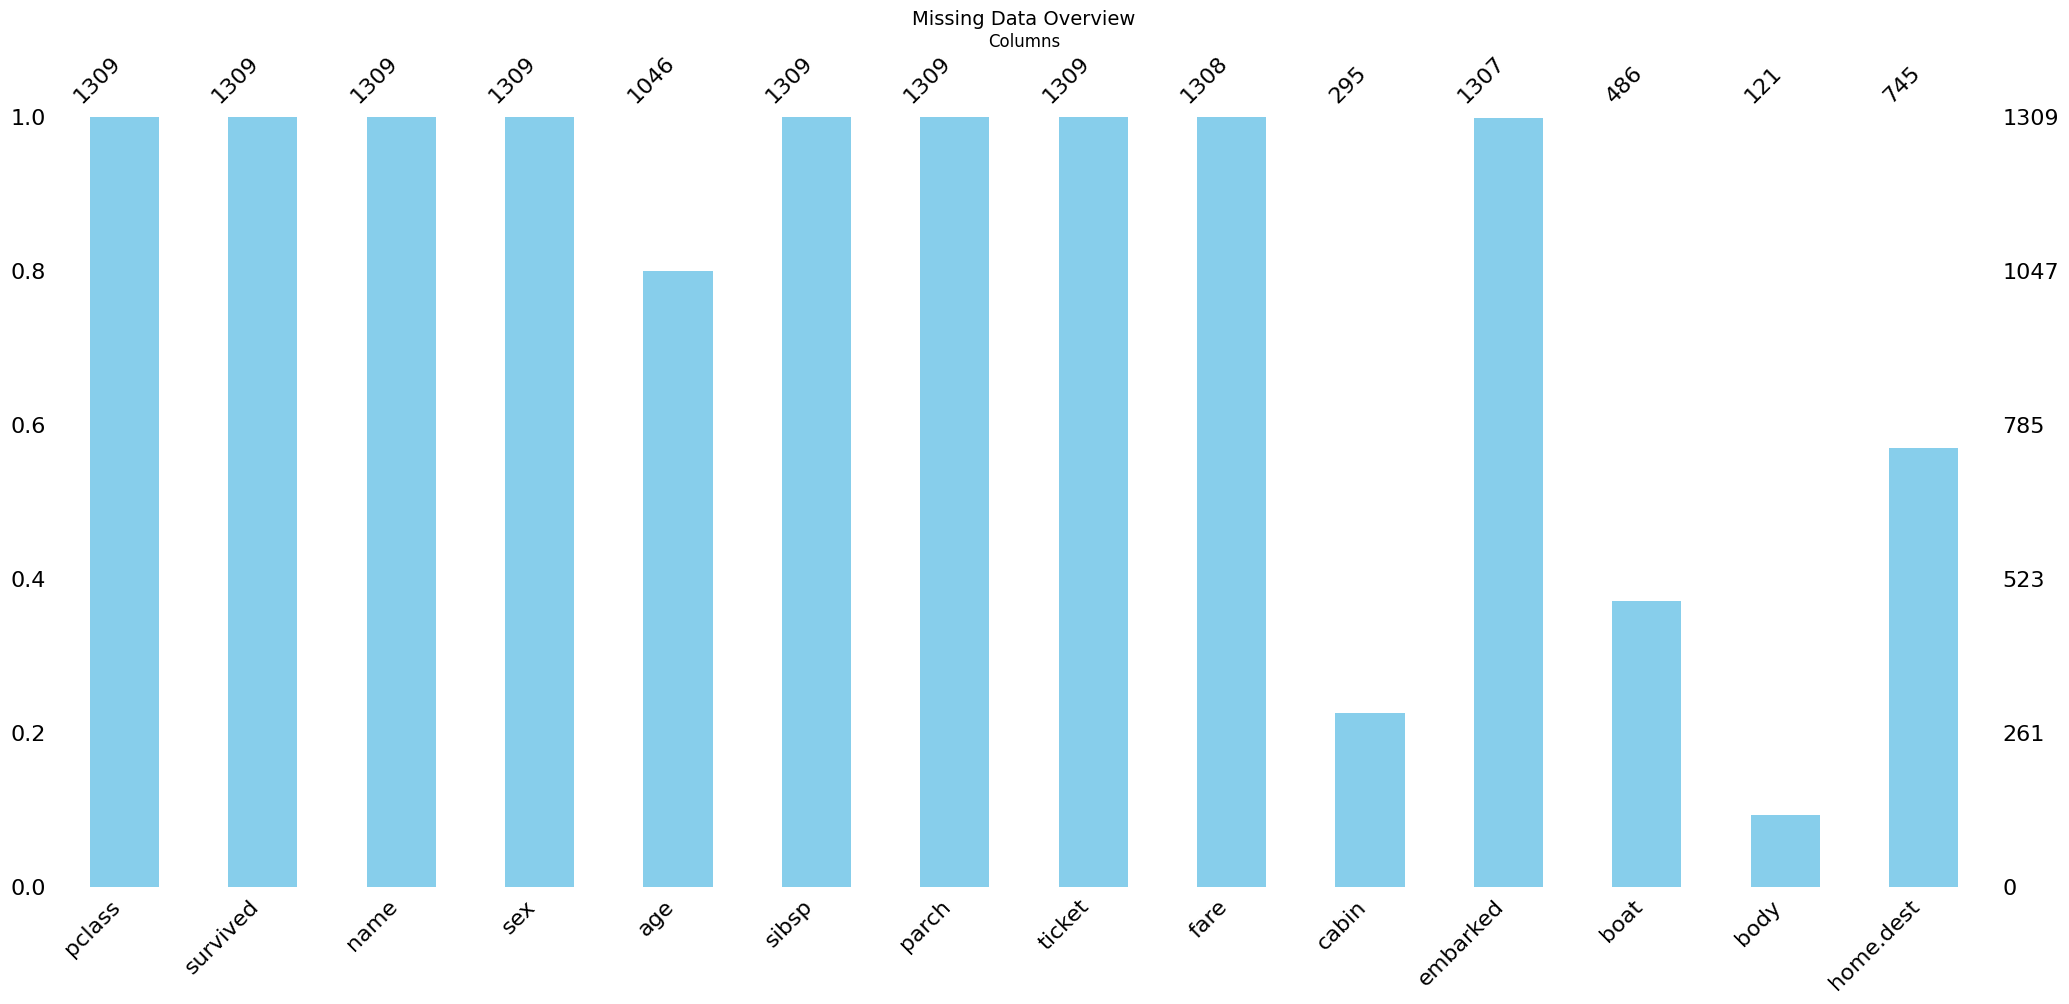

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno  # Visualizing missing data

# 1 Check Missing Values
print("Missing Values:")
display(df.isnull().sum())

# Visualize missing data
plt.figure(figsize=(12, 6))
msno.bar(df, color="skyblue")
plt.title("Missing Data Overview", fontsize=14)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Missing Values Count", fontsize=12)
plt.xticks(rotation=45, ha="right")  # Rotate labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add grid for better visibility
plt.show()



<ipython-input-32-ceefc6031f3f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="survived", data=df, palette="Set2")


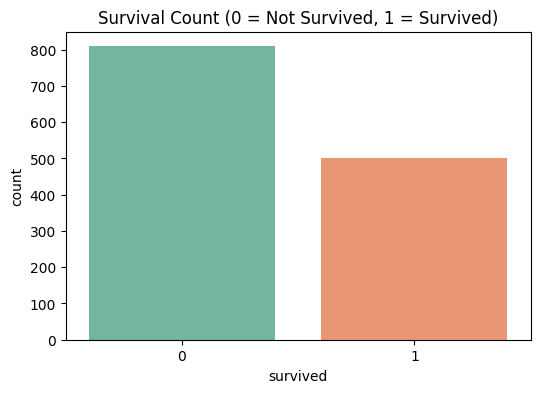

In [ ]:
# 2 Visualizing Survival Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="survived", data=df, palette="Set2")
plt.title("Survival Count (0 = Not Survived, 1 = Survived)")
plt.show()

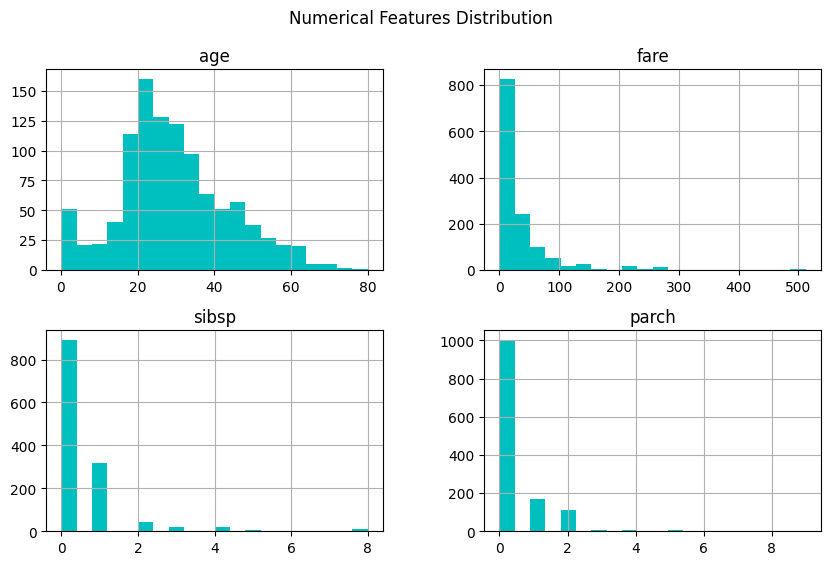

In [ ]:
# 3 Numerical Feature Distributions
numeric_features = ["age", "fare", "sibsp", "parch"]
df[numeric_features].hist(figsize=(10,6), bins=20, color="c")
plt.suptitle("Numerical Features Distribution")
plt.show()

<ipython-input-34-f3bd4a8dc9d3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="pclass", data=df, palette="muted")


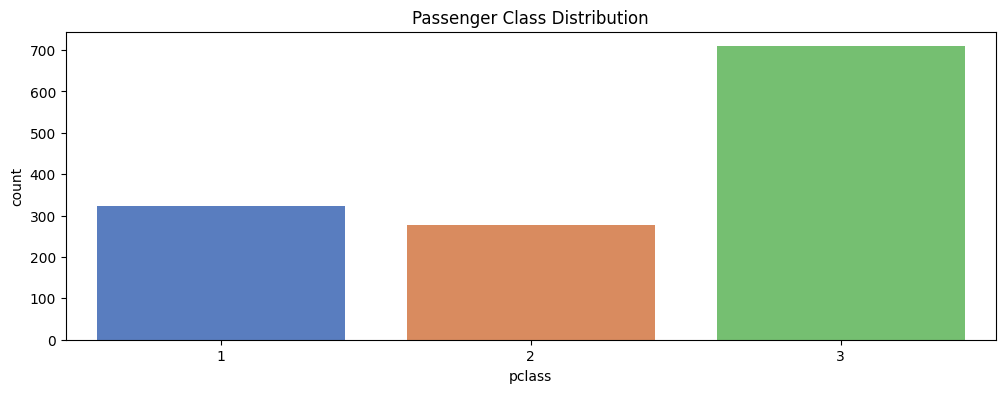

<ipython-input-34-f3bd4a8dc9d3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sex", data=df, palette="muted")


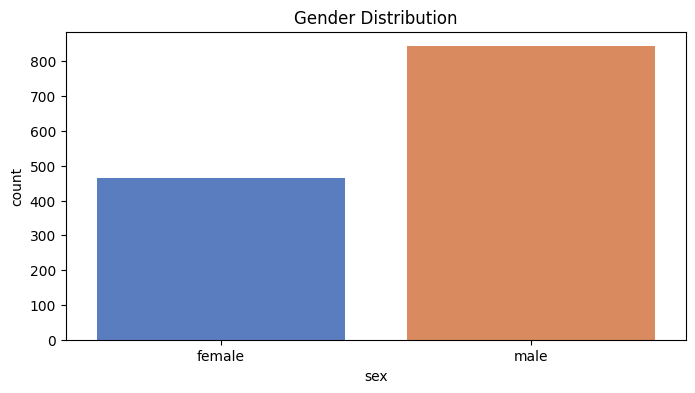

<ipython-input-34-f3bd4a8dc9d3>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="embarked", data=df, palette="muted")


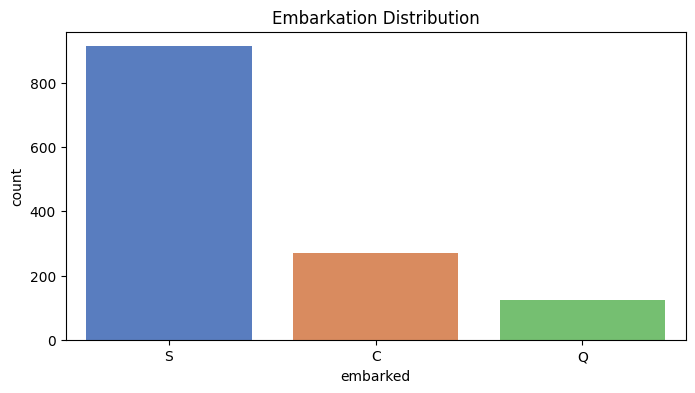

In [ ]:
# 4 Categorical Feature Distributions
plt.figure(figsize=(12,4))
sns.countplot(x="pclass", data=df, palette="muted")
plt.title("Passenger Class Distribution")
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(x="sex", data=df, palette="muted")
plt.title("Gender Distribution")
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(x="embarked", data=df, palette="muted")
plt.title("Embarkation Distribution")
plt.show()



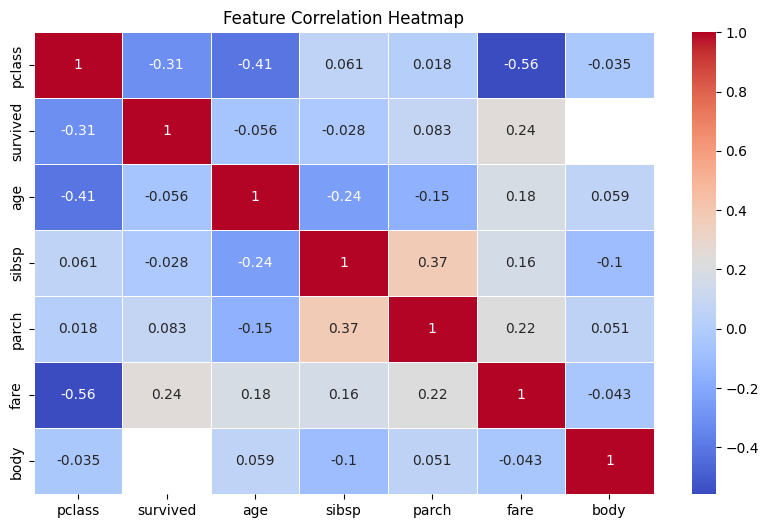

In [ ]:
# 5 Correlation Matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", linewidths=0.5) # Select only numeric columns for correlation calculation
plt.title("Feature Correlation Heatmap")
plt.show()

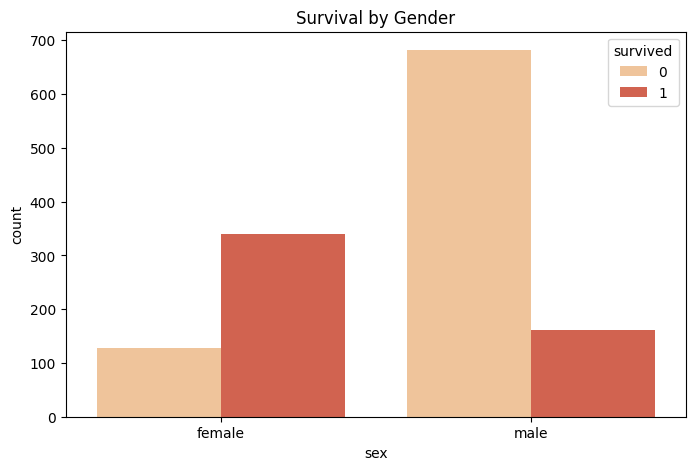

In [ ]:
# 6 Survival by Gender
plt.figure(figsize=(8, 5))
sns.countplot(x="sex", hue="survived", data=df, palette="OrRd")
plt.title("Survival by Gender")
plt.show()


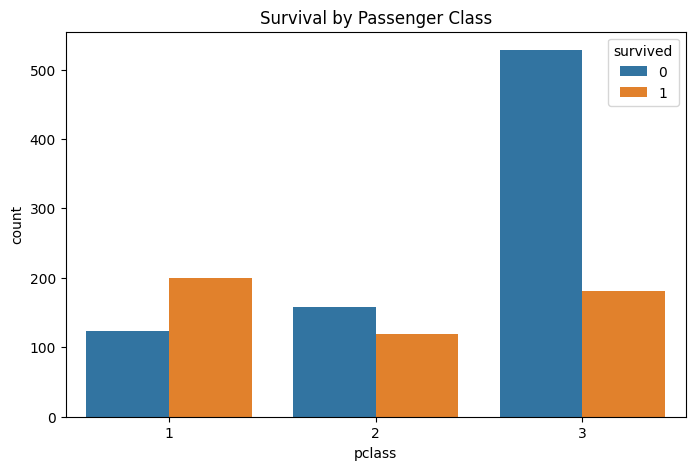

In [ ]:
# 7 Survival by Passenger Class
plt.figure(figsize=(8, 5))
sns.countplot(x="pclass", hue="survived", data=df)
plt.title("Survival by Passenger Class")
plt.show()


<ipython-input-38-002746689f1a>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['survived'] == 1]['age'], shade=True, label="Survived", color="green")
<ipython-input-38-002746689f1a>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['survived'] == 0]['age'], shade=True, label="Not Survived", color="red")


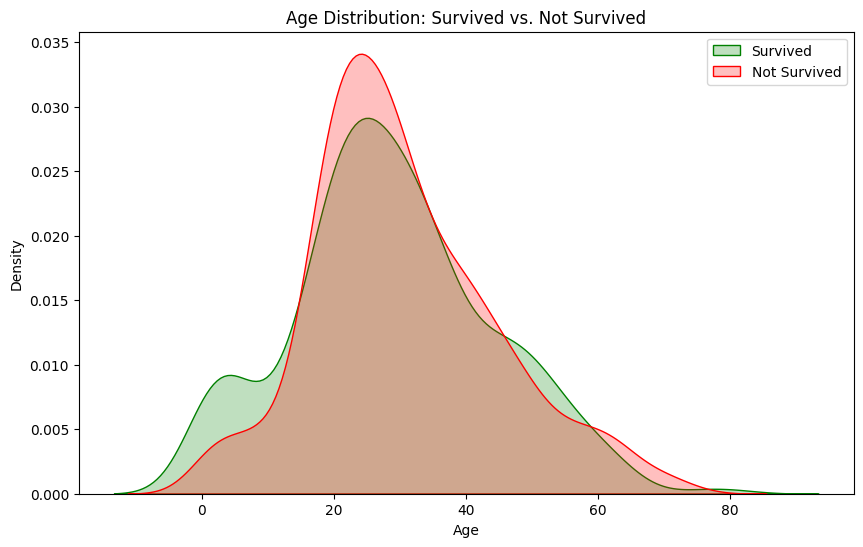

In [ ]:
# 8 Age Distribution of Survivors vs. Non-Survivors
plt.figure(figsize=(10,6))
sns.kdeplot(df[df['survived'] == 1]['age'], shade=True, label="Survived", color="green")
sns.kdeplot(df[df['survived'] == 0]['age'], shade=True, label="Not Survived", color="red")
plt.title("Age Distribution: Survived vs. Not Survived")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()


# Step 3: Handling Missing Values & Feature Engineering

Handling Missing Values

In [ ]:
df_cleaned = df.copy()  # Create a safe copy to avoid modifying the original dataframe

# Fill missing values safely using `.loc[]`
df_cleaned.loc[:, 'age'] = df_cleaned['age'].fillna(df_cleaned['age'].median())
df_cleaned.loc[:, 'fare'] = df_cleaned['fare'].fillna(df_cleaned['fare'].median())
df_cleaned.loc[:, 'embarked'] = df_cleaned['embarked'].fillna(df_cleaned['embarked'].mode()[0])

# Drop 'Cabin' since it has too many missing values
df_cleaned.drop(columns=['cabin'], inplace=True)

# Verify No More Missing Values
print("\nMissing Values After Cleaning:")
display(df_cleaned.isnull().sum())

# Verify Dataset Shape
print("\nDataset shape after cleaning:", df_cleaned.shape)

# Preview Cleaned Data
print("\nCleaned Dataset Preview:")
display(df_cleaned.head())



Missing Values After Cleaning:


,0
pclass,0
survived,0
name,0
sex,0
age,0
sibsp,0
parch,0
ticket,0
fare,0
embarked,0



Dataset shape after cleaning: (1309, 13)

Cleaned Dataset Preview:


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Drop Irrelevant Columns

In [ ]:
# Drop unnecessary columns
df_cleaned.drop(columns=['boat', 'body', 'home.dest'], inplace=True, errors='ignore')

# Verify dataset shape after dropping
print("\nDataset shape after dropping irrelevant columns:", df_cleaned.shape)



Dataset shape after dropping irrelevant columns: (1309, 10)


Feature Engineering

Extract Passenger Title from Name

In [ ]:
# Extract title from Name
df_cleaned['name_title'] = df_cleaned['name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Map common titles
title_mapping = {
    "Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6
}
df_cleaned['name_title'] = df_cleaned['name_title'].map(title_mapping).fillna(6)  # Assign 'Rare' to unknown titles

# Convert to integer type
df_cleaned['name_title'] = df_cleaned['name_title'].astype(int)

# Display title counts
print("Title Count Breakdown:")
display(df_cleaned['name_title'].value_counts().to_frame().rename(columns={'name_title': 'Passenger Count'}))

# Drop 'name' since it's no longer needed
df_cleaned.drop(columns=['name'], inplace=True)


Title Count Breakdown:


,count
name_title,
1,757
2,260
3,197
4,61
6,34


Extract Ticket Features

In [ ]:
# Numeric or alphanumeric ticket (1 = Fully numeric, 0 = Alphanumeric)
df_cleaned['numeric_ticket'] = df_cleaned['ticket'].apply(lambda x: 1 if str(x).isnumeric() else 0)

# Extract ticket prefix (if any)
df_cleaned['ticket_prefix'] = df_cleaned['ticket'].apply(lambda x: ''.join(filter(str.isalpha, str(x))) if not str(x).isnumeric() else 'NoPrefix')

# Display unique ticket prefixes
print("Unique Ticket Prefixes:")
display(df_cleaned['ticket_prefix'].value_counts().to_frame().rename(columns={'ticket_prefix': 'Count'}))

# Drop 'ticket' since it's no longer needed
df_cleaned.drop(columns=['ticket'], inplace=True)

Unique Ticket Prefixes:


,count
ticket_prefix,
NoPrefix,957
PC,92
CA,68
A,39
SOTONOQ,24
STONO,21
WC,15
SCPARIS,14
FCC,9


Create Family-Based Features

In [ ]:
# Create Family Size feature (Self + SibSp + Parch)
df_cleaned['family_size'] = df_cleaned['sibsp'] + df_cleaned['parch'] + 1

# Create 'Is Alone' feature (1 if traveling alone, 0 otherwise)
df_cleaned['is_alone'] = df_cleaned['family_size'].apply(lambda x: 1 if x == 1 else 0)

# Display family size distribution
print("Family Size Distribution:")
display(df_cleaned['family_size'].value_counts().to_frame().rename(columns={'family_size': 'Count'}))


Family Size Distribution:


,count
family_size,
1,790
2,235
3,159
4,43
6,25
5,22
7,16
11,11
8,8


Feature Selection Based on Correlation Analysis

In [ ]:
# Drop the 'body' column since it's not useful for prediction
df_cleaned = df_cleaned.drop(columns=['body'], errors='ignore')  # Ignore if already removed

# Verify the final dataset structure
print("\nFinal Dataset Shape:", df_cleaned.shape)
print("\nFinal Dataset Preview:")
display(df_cleaned.head(15))



Final Dataset Shape: (1309, 13)

Final Dataset Preview:


,pclass,survived,sex,age,sibsp,parch,fare,embarked,name_title,numeric_ticket,ticket_prefix,family_size,is_alone
0,1,1,female,29.0000,0,0,211.3375,S,2,1,NoPrefix,1,1
1,1,1,male,0.9167,1,2,151.5500,S,4,1,NoPrefix,4,0
2,1,0,female,2.0000,1,2,151.5500,S,2,1,NoPrefix,4,0
3,1,0,male,30.0000,1,2,151.5500,S,1,1,NoPrefix,4,0
4,1,0,female,25.0000,1,2,151.5500,S,3,1,NoPrefix,4,0
5,1,1,male,48.0000,0,0,26.5500,S,1,1,NoPrefix,1,1
6,1,1,female,63.0000,1,0,77.9583,S,2,1,NoPrefix,2,0
7,1,0,male,39.0000,0,0,0.0000,S,1,1,NoPrefix,1,1
8,1,1,female,53.0000,2,0,51.4792,S,3,1,NoPrefix,3,0
9,1,0,male,71.0000,0,0,49.5042,C,1,0,PC,1,1


# Step 5: Splitting Data for Model Training

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_cleaned.drop(columns=['survived'])  # Features
y = df_cleaned['survived']  # Target variable

# Split data: 70% train, 15% validation, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

# Verify shape of splits
print(f"Training Set: {X_train.shape}, {y_train.shape}")
print(f"Validation Set: {X_val.shape}, {y_val.shape}")
print(f"Test Set: {X_test.shape}, {y_test.shape}")


Training Set: (916, 12), (916,)
Validation Set: (196, 12), (196,)
Test Set: (197, 12), (197,)


#Step 6: Model Building and Training

Train the Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define categorical features
categorical_features = ['sex', 'embarked', 'ticket_prefix']

# Create a combined dataset of train, validation, and test for encoding
combined_data = pd.concat([X_train, X_val, X_test], axis=0)

# Label Encoding for categorical columns
le_dict = {}  # Store label encoders for later use

for col in categorical_features:
    le = LabelEncoder()
    # Convert the column to string type before encoding
    combined_data[col] = combined_data[col].astype(str)
    # Fit on the combined data to ensure all unique values are seen
    combined_data[col] = le.fit_transform(combined_data[col])
    le_dict[col] = le  # Save encoder for future use

# Split the data back into train, validation, and test sets
X_train = combined_data.iloc[:X_train.shape[0], :]
X_val = combined_data.iloc[X_train.shape[0]:X_train.shape[0] + X_val.shape[0], :]
X_test = combined_data.iloc[X_train.shape[0] + X_val.shape[0]:, :]

# Initialize models
log_model = LogisticRegression(max_iter=1000, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

# Train all models
log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:16:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

#Step 7: Model Evaluation

Evaluate Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predictions on validation set
y_pred_log = log_model.predict(X_val)

# Model evaluation metrics
print("Logistic Regression Performance on Validation Set:")
print("Accuracy:", accuracy_score(y_val, y_pred_log))
print("Precision:", precision_score(y_val, y_pred_log))
print("Recall:", recall_score(y_val, y_pred_log))
print("F1 Score:", f1_score(y_val, y_pred_log))
print("\nClassification Report:\n", classification_report(y_val, y_pred_log))


Logistic Regression Performance on Validation Set:
Accuracy: 0.8520408163265306
Precision: 0.8108108108108109
Recall: 0.8
F1 Score: 0.8053691275167785

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       121
           1       0.81      0.80      0.81        75

    accuracy                           0.85       196
   macro avg       0.84      0.84      0.84       196
weighted avg       0.85      0.85      0.85       196



Evaluate Random Forest

In [ ]:
# Predictions on validation set
y_pred_rf = rf_model.predict(X_val)

# Model evaluation metrics
print("Random Forest Performance on Validation Set:")
print("Accuracy:", accuracy_score(y_val, y_pred_rf))
print("Precision:", precision_score(y_val, y_pred_rf))
print("Recall:", recall_score(y_val, y_pred_rf))
print("F1 Score:", f1_score(y_val, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_val, y_pred_rf))


Random Forest Performance on Validation Set:
Accuracy: 0.7755102040816326
Precision: 0.691358024691358
Recall: 0.7466666666666667
F1 Score: 0.717948717948718

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       121
           1       0.69      0.75      0.72        75

    accuracy                           0.78       196
   macro avg       0.76      0.77      0.77       196
weighted avg       0.78      0.78      0.78       196



Evaluate Random XGBoost

In [ ]:
# Predictions on validation set
y_pred_xgb = xgb_model.predict(X_val)

# Model evaluation metrics
print("XGBoost Performance on Validation Set:")
print("Accuracy:", accuracy_score(y_val, y_pred_xgb))
print("Precision:", precision_score(y_val, y_pred_xgb))
print("Recall:", recall_score(y_val, y_pred_xgb))
print("F1 Score:", f1_score(y_val, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_val, y_pred_xgb))


XGBoost Performance on Validation Set:
Accuracy: 0.826530612244898
Precision: 0.759493670886076
Recall: 0.8
F1 Score: 0.7792207792207793

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.86       121
           1       0.76      0.80      0.78        75

    accuracy                           0.83       196
   macro avg       0.82      0.82      0.82       196
weighted avg       0.83      0.83      0.83       196



Confusion Matrix

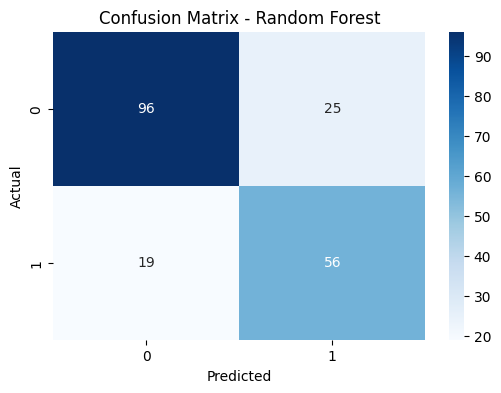

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Plot for Random Forest (assuming it's the best model)
plot_confusion_matrix(y_val, y_pred_rf, "Random Forest")


#Step 8: Hyperparameter Tuning

For Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
print(" Best Parameters:", grid_search.best_params_)

# Train Random Forest with the best parameters
best_rf_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_rf_model.fit(X_train, y_train)


 Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}


RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)

# Step 9: Final Model Testing

We will now test the best Logistic Regression model on the test set.

In [ ]:
# Predict on test set
y_test_pred = best_rf_model.predict(X_test)


# Evaluate final model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Function to format and display evaluation metrics
def display_evaluation_results(y_true, y_pred, model_name):
    print(f"Final {model_name} Performance on Test Set:\n")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score:  {f1_score(y_true, y_pred):.4f}")
    print("Classification Report:\n")
    print(classification_report(y_true, y_pred))

# Call the function to display test results
display_evaluation_results(y_test, y_test_pred, "Tuned Random Forest Model")



Final Tuned Random Forest Model Performance on Test Set:

Accuracy:  0.8071
Precision: 0.7534
Recall:    0.7333
F1 Score:  0.7432
Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       122
           1       0.75      0.73      0.74        75

    accuracy                           0.81       197
   macro avg       0.80      0.79      0.79       197
weighted avg       0.81      0.81      0.81       197



#Step 10: Save the Final Model

Mount Google Drive in Colab

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Save the trained model to Google Drive

In [ ]:
import pickle
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define save path for the trained model
model_path = "/content/drive/MyDrive/Colab Notebooks/Data/EAI6020/best_rf_model.pkl"

# Save the trained Random Forest model
with open(model_path, "wb") as f:
    pickle.dump(best_rf_model, f)

print(f" Model saved successfully at: {model_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Model saved successfully at: /content/drive/MyDrive/Colab Notebooks/Data/EAI6020/best_rf_model.pkl
